In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Coding assistance from matplotlib and sns documentation

In [34]:
#Read pre processed data into pandas df and drop the index column that comes in from the spreadsheet
df=pd.read_excel('Data/HorseColicData_DeathTarget.xlsx',index=False)
df.shape

(368, 20)

In [35]:
df=df.drop(['Unnamed: 0','outcome'],axis=1)
df

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain a subjective judgement of the horses pain level,peristalsis,abdominal distension,packed cell volume,total protein,surgical lesion,type of lesion,Target,location of lesion
0,2,1,38.5,66,28,3,3,0,2,5,4,4,45.0,1,2,1,1,1
1,1,1,39.2,88,20,0,0,4,1,3,4,2,50.0,1,2,2,1,2
2,2,1,38.3,40,24,1,1,3,1,3,3,1,33.0,0,2,0,0,0
3,1,9,39.1,164,84,4,1,6,2,2,4,4,48.0,0,1,2,1,2
4,2,1,37.3,104,35,0,0,6,2,0,0,0,74.0,0,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2,1,38.6,60,30,1,1,3,1,4,2,2,40.0,0,1,2,0,3
364,2,1,37.8,42,40,1,1,1,1,1,3,1,36.0,0,2,1,0,4
365,1,1,38.0,60,12,1,1,2,1,2,1,1,44.0,1,1,2,1,2
366,2,1,38.0,42,12,3,0,3,1,1,1,1,37.0,1,2,1,0,3


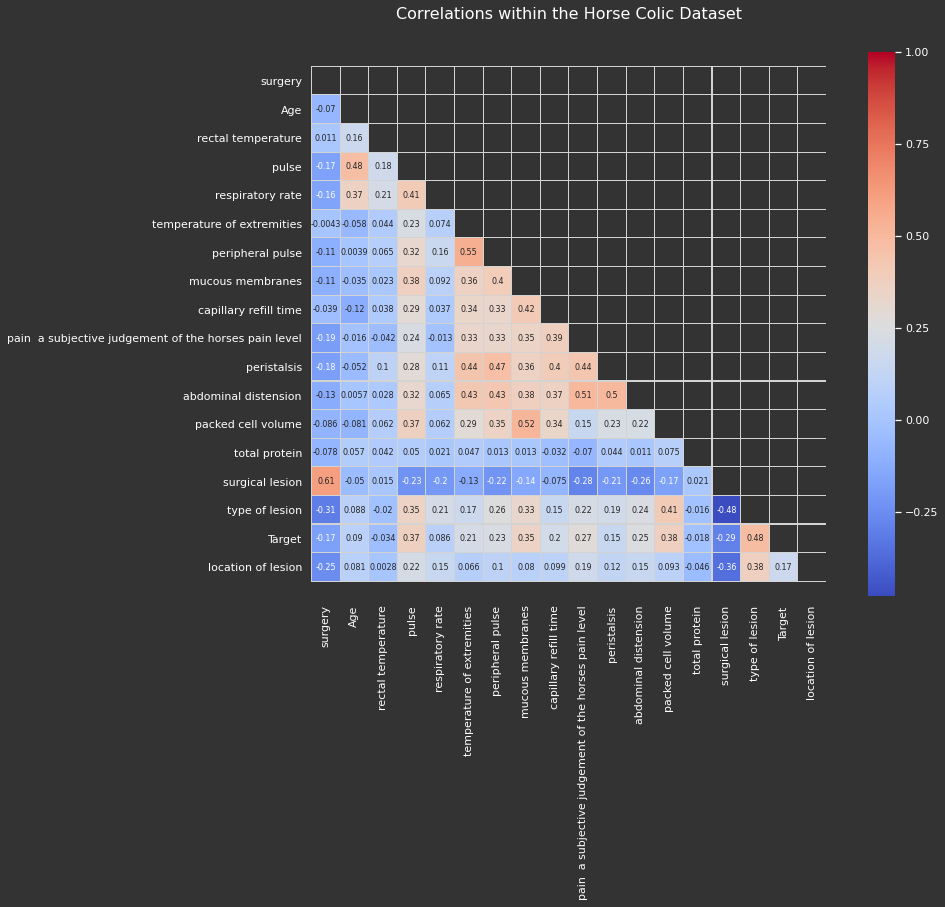

In [36]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(15,10))
plt.title(u'Correlations within the Horse Colic Dataset', y=1.05, size=16)
plt.rcParams['font.size']=8

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='lightgrey', annot=True)
bttm, tp = plt.ylim()
bttm += 0.5 
tp -= 0.5 
plt.ylim(bttm, tp) 
plt.show()

In [19]:
print('Top five features which correlate strongest with death')
print(df.corr()['Target'].sort_values(ascending=False)[1:6])

Top five features which correlate strongest with death
type of lesion                                           0.480634
packed cell volume                                       0.377041
pulse                                                    0.371072
mucous membranes                                         0.353489
pain  a subjective judgement of the horses pain level    0.274032
Name: Target, dtype: float64


In [20]:
print('Top five features which correlate strongest with reuired surgery')
print(df.corr()['surgical lesion'].sort_values(ascending=False)[1:6])

Top five features which correlate strongest with reuired surgery
surgery                  0.611526
total protein            0.021298
rectal temperature       0.014883
Age                     -0.049852
capillary refill time   -0.074508
Name: surgical lesion, dtype: float64


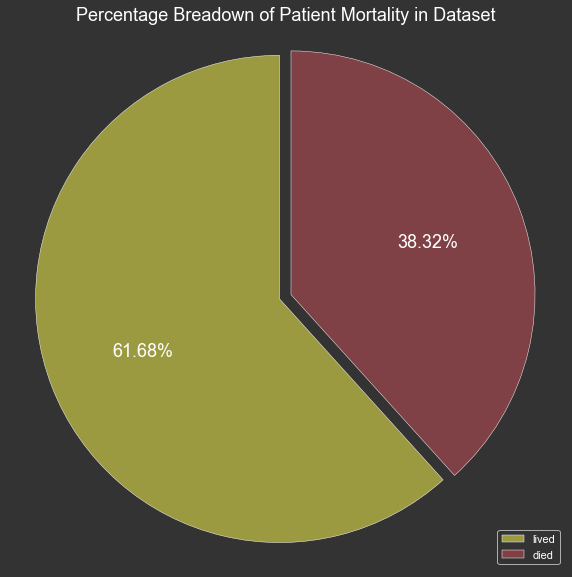

In [21]:
plt.rcParams["figure.figsize"] = (10,10)
color_palette_list= ['#9C9A40','#7F4145','#BD3D3A','#BD3D3A']

mystates = list(['lived','died'])
sizes = list(df.Target.value_counts())
explode = (0.05,0)  # set the largest sales share out for easier identification
sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, textprops={'fontsize': 18,'color':'white'},autopct='%.2f%%',
        shadow=False, startangle=90,colors=color_palette_list[0:],
       wedgeprops={'linewidth': .45, 'linestyle': 'solid','edgecolor' : 'white', 'antialiased': True})

ax1.axis('equal')  

ax1.legend(labels=mystates,
          title="Agency Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 12})

legend = ax1.legend(labels=mystates)
plt.setp(legend.get_texts(), color='w')
ax1.set_title("Percentage Breadown of Patient Mortality in Dataset", fontsize=18, color='white')
fig1.savefig('Mortality.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))
plt.show()

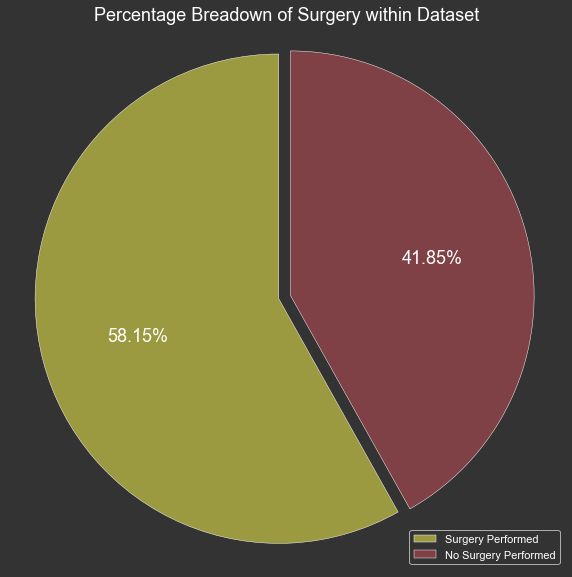

In [61]:
plt.rcParams["figure.figsize"] = (10,10)
color_palette_list= ['#9C9A40','#7F4145','#BD3D3A','#BD3D3A']
df['surgery'].replace(to_replace =0, value =2,inplace=True)

mystates = list(['Surgery Performed','No Surgery Performed'])
sizes = list(df.surgery.value_counts())
explode = (0.05,0)  # set the largest sales share out for easier identification
sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, textprops={'fontsize': 18,'color':'white'},autopct='%.2f%%',
        shadow=False, startangle=90,colors=color_palette_list[0:],
       wedgeprops={'linewidth': .45, 'linestyle': 'solid','edgecolor' : 'white', 'antialiased': True})

ax1.axis('equal')  

ax1.legend(labels=mystates,
          title="Agency Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 12})

legend = ax1.legend(labels=mystates)
plt.setp(legend.get_texts(), color='w')
ax1.set_title("Percentage Breadown of Surgery within Dataset", fontsize=18, color='white')
fig1.savefig('SurgeryYN.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))
plt.show()

1    29
2    13
Name: surgical lesion, dtype: int64

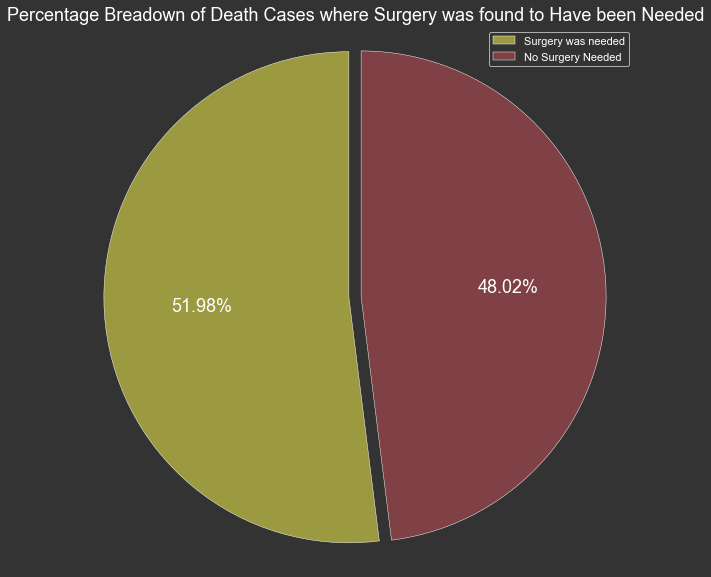

In [59]:
plt.rcParams["figure.figsize"] = (10,10)
color_palette_list= ['#9C9A40','#7F4145','#BD3D3A','#BD3D3A']

mystates = list(['Surgery was needed','No Surgery Needed'])
sizes = list(df[df.Target==0]['surgical lesion'].value_counts())
explode = (0.05,0)  # set the largest sales share out for easier identification
sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, textprops={'fontsize': 18,'color':'white'},autopct='%.2f%%',
        shadow=False, startangle=90,colors=color_palette_list[0:],
       wedgeprops={'linewidth': .45, 'linestyle': 'solid','edgecolor' : 'white', 'antialiased': True})

ax1.axis('equal')  

ax1.legend(labels=mystates,
          title="Agency Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 12})

legend = ax1.legend(labels=mystates)
plt.setp(legend.get_texts(), color='w')
ax1.set_title("Percentage Breadown of Death Cases where Surgery was found to Have been Needed", fontsize=18, color='white')
fig1.savefig('DeathSurgeryNeeded.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))
plt.show()

In [57]:
df[(df.Target == 1) & (df.surgery == 2)]['surgical lesion'].value_counts()

1    29
2    13
Name: surgical lesion, dtype: int64

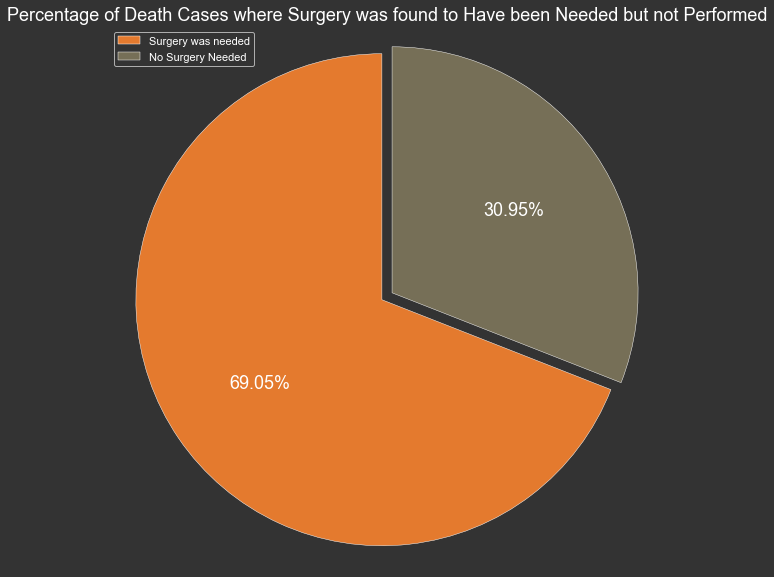

In [58]:
plt.rcParams["figure.figsize"] = (10,10)
color_palette_list= [ '#E47A2E', '#766F57',"#006E6D",'#7F4145','#223A5E']

mystates = list(['Surgery was needed','No Surgery Needed'])
sizes = list(
df[(df.Target == 1) & (df.surgery == 2)]['surgical lesion'].value_counts())
explode = (0.05,0)  # set the largest sales share out for easier identification
sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, textprops={'fontsize': 18,'color':'white'},autopct='%.2f%%',
        shadow=False, startangle=90,colors=color_palette_list[0:],
       wedgeprops={'linewidth': .45, 'linestyle': 'solid','edgecolor' : 'white', 'antialiased': True})

ax1.axis('equal')  

ax1.legend(labels=mystates,
          title="Agency Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 12})

legend = ax1.legend(labels=mystates)
plt.setp(legend.get_texts(), color='w')
ax1.set_title("Percentage of Death Cases where Surgery was found to Have been Needed but not Performed", fontsize=18, color='white')
fig1.savefig('DeathSurgeryNeededNotDone.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


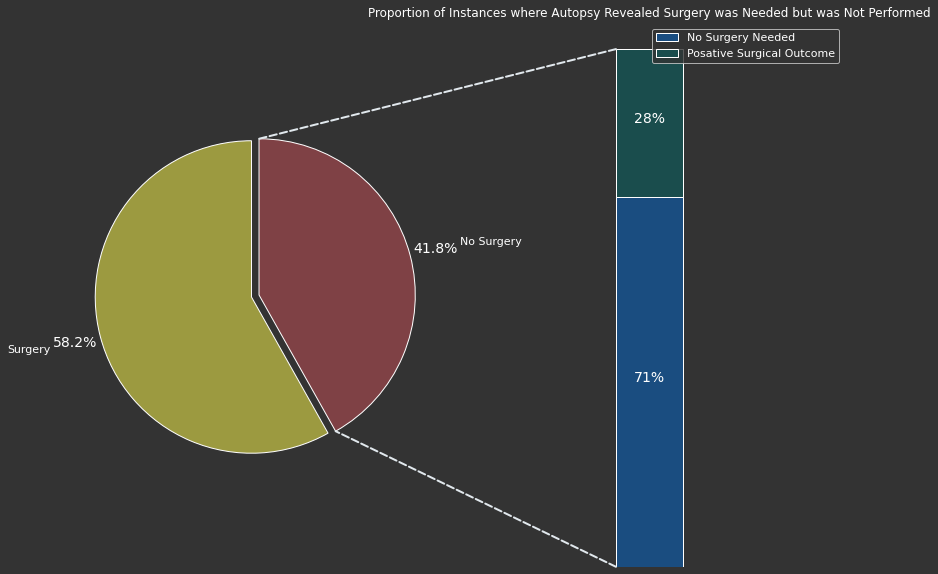

In [23]:
from matplotlib.patches import ConnectionPatch
# make figure and assign axis objects
df['surgery'].replace(to_replace =0, value =2,inplace=True)
plt.rcParams['font.sans-serif'] = 'montserrat'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor']= 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['font.size']=14
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = list(df.surgery.value_counts())
labels = list(['Surgery', 'No Surgery'])
explode = (0.05,0)
# rotate so that first wedge is split by the x-axis
angle = -45 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode,pctdistance=1.17,labeldistance=1.33,colors=color_palette_list[0:])

# bar chart parameters

xpos = 0
bottom = 0
ratios = list(df[df.surgery==2]['surgical lesion'].value_counts()/df[df.surgery==2]['surgical lesion'].value_counts().sum())
#ratios = [4, 90, 5, 1]

width = .2
colors = [[.1, .3, .5], [.1, .3, .3]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Proportion of Instances where Autopsy Revealed Surgery was Needed but was Not Performed')
ax2.legend(('No Surgery Needed','Posative Surgical Outcome'))
ax2.axis('off')
ax2.set_xlim(- 2.9 * width, 2.9 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[1].theta1, ax1.patches[1].theta2
center, r = ax1.patches[1].center, ax1.patches[1].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color('#e1e8ed')
con.set_linewidth(2)
con.set_linestyle('dashed')
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
#movelegend
#ax2.legend(loc="right")

con.set_color('#e1e8ed')
ax2.add_artist(con)
con.set_linestyle('dashed')
con.set_linewidth(2)
fig.savefig('SurgicalBreakdown.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))
plt.show()